In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Projet 1 - Modélisation du slicing dans les réseaux 5G

### 1) 

Modiliser le nombre moyen de clients dans une file M/M/S/S à l’état stationnaire sans calculer de factorielle.<br>
En reprennant relation de récurrence de la formule de d’Erlang-B : 

$$
\frac{1}{\mathrm{Erl}_B[\rho, 0]} = 1 \\
\frac{1}{\mathrm{Erl}_B[\rho, S]} = 1 + \frac{S}{\rho\, \mathrm{Erl}_B[\rho, S-1]}.
$$

Pour rappel, la file M/M/S/S est definis comme :
- Arrivées de parametre $\lambda$
- Service de parametre $\mu$
- S serveur, pas de buffer
- $\rho$ = $\frac{\lambda}{\mu}$
- Modele a perte, car pas de file d'attente, si les S serveurs sont occupé, le client est perdu.

Je pose N, le nombre de clients a l'etat stationnaire (ne varie pas), alors comme vue dans le cours, le nombre moyen de clients est donné par  :

$$ \mathbb{E}[N] = \sum_{k=1}^{S} k \cdot \pi_s(k) $$

Or le $\pi_s(i)$ est la proba stationnaire d'avoir i clients dans le systeme donc : 
$$\pi_s(i) = \frac{\dfrac{\rho^i}{i!}}{\sum_{j=0}^{S} \dfrac{\rho^j}{j!}} = \frac{\rho^i}{i!}\pi_s(0)$$ 

Donc on trouve cette fomule finale : $$\boxed{\mathbb{E}[N] = \sum_{n=1}^{S} n \cdot \frac{\dfrac{\rho^n}{n!}}{\sum_{j=0}^{S} \dfrac{\rho^j}{j!}}}$$

In [18]:
#Fonction qui calcul #moyen de clients dans un système M/M/S/S à l’état stationnaire
def mean_number_waiting_customers(arrival_rate,service_rate,nb_of_servers):
    rho = arrival_rate / service_rate #(Fomule de lambda\mu)
    value = 1.0  
    pi_0 = value
    numerateur = 0.0

    #Fais la reccurance sur tout les thermes et traite le numerateur et deniminateur separement pour ne pas faire de factorielle
    for n in range(1, nb_of_servers + 1):
        value *= rho / n  
        pi_0 += value
        numerateur += n * value  
    #Renvoie la moyenne E[N]
    return numerateur / pi_0


#print(mean_number_waiting_customers(4,2,10))
#EQ1 = mean_number_waiting_customers(4,2,10)

#lambda2 = (10 - EQ1)*1
#print(lambda2)


Via les résultats connus sur le modèle $M/M/\infty$, on sait que lorsque $ S \rightarrow +\infty $ :

$$
\pi_{\infty}(i) = \frac{\dfrac{\rho^i}{i!}}{\sum_{j=0}^{\infty} \dfrac{\rho^j}{j!}} = e^{-\rho} \frac{\rho^i}{i!}
$$

Ceci correspond exactement à une loi de Poisson de paramètre $ \rho $.

Par definition d'une loi de poission, le nombre moyen de clients dans le système quand $ S \rightarrow +\infty $ est :

$$
\mathbb{E}[N] = \sum_{i=0}^{\infty} i \cdot \pi_{\infty}(i) = \rho
$$

Cela montre que, dans le cas d'une infinité de serveurs, le système ne sature jamais et le nombre moyen de clients est simplement donné par le rapport entre le taux d’arrivée et le taux de service.

Pour ce qui est de $Erl_B[ρ,S]$ << 1, cela veux dire peut de perte, donc pas d'attente, c'est comme si on avais des serveurs infini du point de vue du client client. 


### <ins>3-Modélisation</ins>

Dans cette partie, nous avons 2 types de clients : 

Type 1 (priorité plus elevé):
- Arrive selon $PP(\lambda_1)$
- Durée de service $Exp(\mu_1)$
- Non bufferisés
- Capacité de préemption 
<br>

Type 2 :
- Arrive selon $PP(\lambda_1)$
- Durée de service $Exp(\mu_2)$
- Bufferisés

On note : 
- $Q_1$ = #clients de type 1 dans le systeme, respectivement $Q_2$.
- $S_1$ = #nombre de serveurs occupés par des clients de type 1, respectivement $S_2$.
- B = #clients de type 2 dans le buffer


##### 3.1)
Si j'ecris mathematiquement les definitions : 

- $S_1 + S_2 < S$ $\Leftrightarrow$ Il reste des serveurs libres, donc un client de type 1 peut être servi immédiatement.

- $S_1 + S_2 = S$ $\Leftrightarrow$ Tous les serveurs sont occupés. Grâce à la préemption, un client de type 2 est déplacé dans le buffer pour libérer un serveur pour un client de type 1.

- $S_1 = S$ $\Leftrightarrow$ Tous les serveurs sont occupés par des clients de type 1. Un nouveau client de type 1 est alors perdu.

- $ Q_1 = S_1 $, car les clients de type 1 ne sont jamais bufferisés.

- $ Q_2 = S_2 + B$, car les clients de type 2 peuvent être en service et/ou en file d’attente.

Donc

Si $ q_1 + s_2 < S $ $\Rightarrow$ il reste au moins un serveur libre.

Or, si b > 0 $\Rightarrow$ y a des clients de type 2 dans le buffer, et qu’il reste un serveur libre, le client dans le buffer serait automatiquement mis dans un serveur.

Donc la situation $ b > 0 $ n’est valable qu’avec un système saturé : $ q_1 + s_2 = S $.  
Donc j'en conclu que :

$$
\boxed{q_1 + s_2 < S \quad \Rightarrow \quad b = 0}
$$


#### 3.3)

En reprenant les définitions du dessus, la transitions du processus $ (Q_1, Q_2) $ sont :

- $ (q_1, q_2) \rightarrow (q_1 + 1, q_2) = \lambda_1 $

- $ (q_1, q_2) \rightarrow (q_1, q_2 + 1) = \lambda_2 $

- $ (q_1, q_2) \rightarrow (q_1 - 1, q_2) = \min(q_1, S) \cdot \mu_1 $  
  (car on peut servir au plus $ S $ clients de type 1, grâce à la préemption)

- $ (q_1, q_2) \rightarrow (q_1, q_2 - 1) = \min(q_2, S - q_1) \cdot \mu_2 $  
  (car les clients de type 1 sont prioritaires, donc on peut servir au plus $ S - q_1 $ clients de type 2 si il y a $q_1$ clients de type 1 dans le systeme)




### 3.4)


In [ ]:
#Focntion qui calcule la loi de Erlang-B theorique (sans la factorielle)
def erlang_b(rho, S):
    value = 1.0
    denominator = value
    for n in range(1, S + 1):
        value *= rho / n
        denominator += value
    return value / denominator

In [ ]:
#Focntion qui fais la simulation du systeme avec 2 type de clients T_1 et T_2
def simulation(temps_simulation, S, mu1, mu2, lambda1, lambda2):
    np.random.seed(0)
    temps = 0
    Q1 = 0
    Q2 = 0
    historique_temps = []
    Q1_list = []
    Q2_list = []

    duree_pleine_charge_Q1 = 0
    arrivées_type2 = []
    attente_totale_t2 = 0
    nb_servis_t2 = 0

    while temps < temps_simulation:
        liste_evenements = []
        
        # Arrivée de type 1 ssi pas deja plein
        if Q1 < S:
            liste_evenements.append(('arriver_T1', lambda1)) #Formule de transition (q1,q2) -> (q1+1,q2)
        else:
            liste_evenements.append(('arrive_T1_perdu', 0))  #Client type 1 perdu (Q1=S)
        
        liste_evenements.append(('depart_T1', min(Q1, S) * mu1)) #Formule de transition (q1,q2) -> (q1-1,q2)
        liste_evenements.append(('arriver_T2', lambda2)) #Formule de transition (q1,q2) -> (q1,q2+1)
        liste_evenements.append(('depart_T2', min(Q2, S - Q1) * mu2)) #Formule de transition (q1,q2) -> (q1,q2−1)
        #print(evenements)
        
        evenements = []
        taux = []

        #Separe pour avoir nom et valeur en 2 variables
        for nom, val in liste_evenements:
            evenements.append(nom)
            taux.append(val)

        taux_total = sum(taux) #Pour voir le parametre de mon exp pour le prochain evenement
        if taux_total == 0:
            break

        # Temps jusqu’au prochain événement
        dt = np.random.exponential(1 / taux_total)
        temps += dt
        
        # Si Q1 occupe tous les serveurs, mesure la durée de saturation
        if Q1 == S:
            duree_pleine_charge_Q1 += dt

        prochain_event = np.random.choice(evenements, p=np.array(taux) / taux_total) #Formule de probabilité de transition

        # Mise a jour du système selon l’événement
        if prochain_event == 'arriver_T1' and Q1 < S:
            Q1 += 1
        elif prochain_event == 'depart_T1' and Q1 > 0:
            Q1 -= 1
        elif prochain_event == 'arriver_T2':
            Q2 += 1
            arrivées_type2.append(temps)
        elif prochain_event == 'depart_T2' and Q2 > 0 and min(Q2, S - Q1) > 0:
            Q2 -= 1
            nb_servis_t2 += 1
            if arrivées_type2:
                arrival_time = arrivées_type2.pop(0)
                attente_totale_t2 += temps - arrival_time

        historique_temps.append(temps)
        Q2_list.append(Q2)
        Q1_list.append(Q1)
    
    # Calcul final du temps d’attente moyen pour les clients type 2
    if nb_servis_t2 > 0 : 
        moy_attente_t2 = attente_totale_t2 / nb_servis_t2
    else :
        moy_attente_t2 = 0

    return (duree_pleine_charge_Q1 / temps_simulation), historique_temps, Q2_list, Q1_list, moy_attente_t2



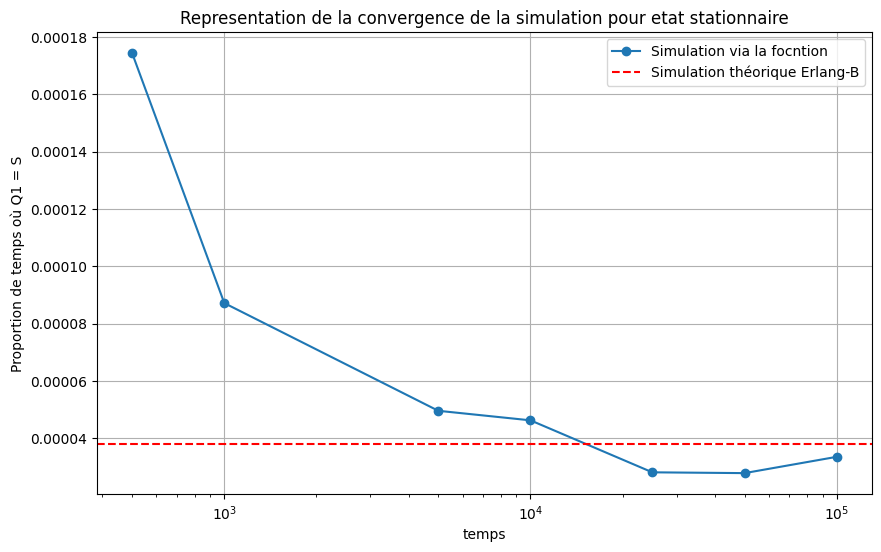

In [28]:
liste_durees = [500, 1000,5000, 10000,25000,50000, 100000] # Paramètres de la simulation pour voir la convergence

# Settings de l'annoncé pour le systeme 
S = 10
mu1 = 2
mu2 = 1
lambda1 = 4
lambda2 = 3
rho1 = lambda1 / mu1

# Simulation des 2 cas (theorique et empirique) pour comparaison
theorique = erlang_b(rho1, S)
simulation_converg = [simulation(duree, S, mu1, mu2, lambda1, lambda2)[0] for duree in liste_durees]

#Partie plot de la convergence
plt.figure(figsize=(10, 6))
plt.plot(liste_durees, simulation_converg, marker='o', label='Simulation via la focntion')
plt.axhline(y=theorique, color='r', linestyle='--', label='Simulation théorique Erlang-B')
plt.xscale('log') 
plt.xlabel('temps')
plt.ylabel('Proportion de temps où Q1 = S')
plt.title('Representation de la convergence de la simulation pour etat stationnaire') 
plt.legend()
plt.grid(True)
plt.show()

### 3.4)
Comme vu en cours :
<p align="center">
  <img src="formule1.png" width="400"/>
</p>

$$
\frac{1}{T} \int_0^T \mathbf{1}_{\{S\}}(x_1(s)) \, ds
$$

Représente la proportion du temps durant laquelle tous les serveurs sont occupés par des clients de type 1.<br>
D’après la propriété PASTA, les arrivées de clients de type 1 voient le système dans une configuration stationnaire du processus $ x_1(t) $. <br>De plus le processus $x_1(t)$ ($Q_1(t)$)
est irréductible et récurrent.<br>
Donc comme preciser dans votre livre (2.5.2) et en cours, ce processus est ergodique, et d’après le théorème on a la convergence :

$$
\frac{1}{T} \int_0^T \mathbf{1}_{\{S\}}(x_1(s)) \, ds \xrightarrow[T \to \infty]{} \pi_S(s)
$$
pour $ \pi_S(s) $ :
$$
\pi_S(s) = \frac{\rho_1^S / S!}{\sum_{j=0}^{S} \rho_1^j / j!}
\quad \text{avec} \quad \rho_1 = \frac{\lambda_1}{\mu_1}
$$

Probabilité qu’un client de type 1 arrivant dans le système trouve tous les serveurs occupés donc perdu.


### <ins>4 Stationnarité</ins>



#### 4.1)
L'inégalité correspond à : $\rho_2 + \mathbb{E}[Q_1] < S$, pour une charge $\rho_1$, car $\mathbb{E}[Q_1] = \mathbb{E}[S_1]$ représente le nombre moyen de clients de type 1 dans le système.  
En utilisant la fonction `mean_number_waiting_customers()`, on peut calculer facilement $\mathbb{E}[Q_1]$.



Si je fixe $\lambda_1 = 4$ et $\mu_2 = 1$, comme défini dans l'exercice 3.4, je vais essayer de déterminer la valeur de $\lambda_2$ telle que la condition $\rho_2 + \mathbb{E}[Q_1] < S$ soit à la limite de saturation donc =.

On a :

$$
\lambda_2 = (S - \mathbb{E}[Q_1]) \cdot \mu_2 = 8
$$


Cela veux dire que si je définis mon système avec les paramètres suivants, le système ne devrait pas admettre de régime stationnaire  (la file de clients type 2 divergera avec le temps) :

- $\lambda_1 = 4$
- $\lambda_2 = 8$
- $\mu_1 = 2$
- $\mu_2 = 1$
- $S = 10$

Voici le code et le graphique permettant de vérifier cela avec le nombre de client de type 2 dans le systeme :


Charge 9.999923619664118
Charge 8.999923619664118
Charge 6.999923619664118


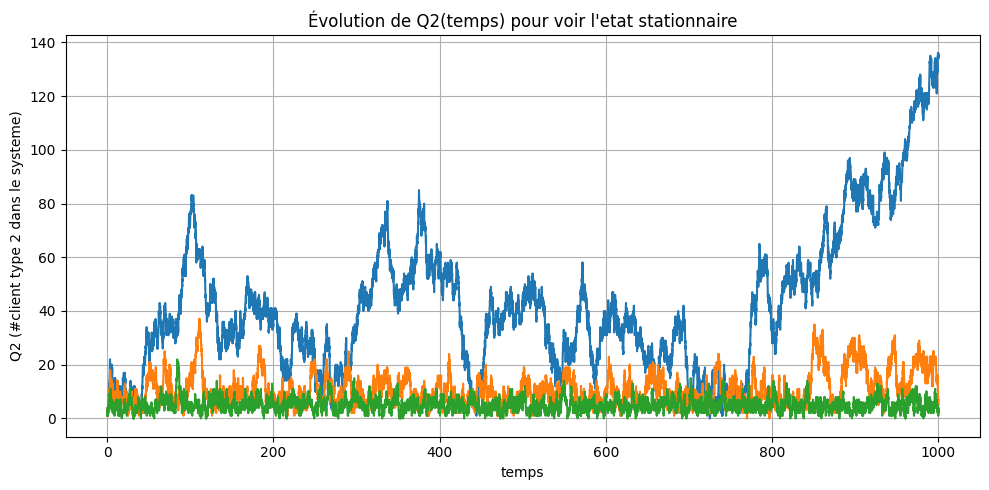

In [29]:
#Settings de l'exo 3.4
S = 10
mu1 = 2
mu2 = 1

couple_lambda= [
    (4, 8),  #\rho_2 + \mathbb{E}[Q_1] = S
    (4, 7),  #\rho_2 + \mathbb{E}[Q_1] < S (tout juste inferieur)
    (4, 5),  #\rho_2 + \mathbb{E}[Q_1] < S (Stationnaire)

]

plt.figure(figsize=(10, 5))

#test le systeme sur les differents couple de \lambda_{i,j}
for _, (lambda1, lambda2) in enumerate(couple_lambda):
    second_terme = mean_number_waiting_customers(lambda1, mu1, S) #Calcul le nombre moyen de client type 1 (\mathbb{E}[Q_1])
    charge_systeme = (lambda2 / mu2) + second_terme #Partie de gauche de l'innegalité
    print(f"Charge {charge_systeme}")

    _, temps, q2, _ , _= simulation(1000, S, mu1, mu2, lambda1, lambda2) #Resultats de Q(temps) pour le \lambda_2 choisi
    plt.plot(temps, q2)

#Partie plot
plt.xlabel("temps")
plt.ylabel("Q2 (#client type 2 dans le systeme)")
plt.title("Évolution de Q2(temps) pour voir l'etat stationnaire")
plt.grid(True)
plt.tight_layout()
plt.show()


Avec cette simulation, on peut clairement vérifier que cette inégalité est bien respectée.  
On remarque que pour la valeur de $\lambda_2$ au seuil d'egalité, le système diverge complètement avec le temps.

Par contre, pour les valeurs légèrement inférieures du seuil (même très proches), on commence à observer un régime stationnaire, comme sur la courbe orange et surtout sur la verte.


### <ins>5 Calcul de la probabilité stationnaire<ins>

#### 5.1)

Je fixe le vecteur $\Pi = (x_0, x_1, x_2, \dots, x_j, x_{j+1}, \dots, x_L)$.  
Pour le générateur infinitésimal donné en 6.1 de l'article, et pour $j > S$, les équations d'équilibre sont données par $\Pi \cdot Q = 0$, soit :

$$
x_{j-1} C + x_j B_j + A_{j+1} x_{j+1} = 0
$$

Je veux montrer que la suite $x_j = x_S R^{j - S}$ est solution des équations d’équilibre au-delà du rang $S$.

Je remplace alors :

$$
\begin{aligned}
x_{j-1} &= x_S R^{j - S} R^{-1} \\
x_j     &= x_S R^{j - S} \\
x_{j+1} &= x_S R^{j - S} R
\end{aligned}
$$

En injectant dans l'équation d’équilibre :

$$
x_S R^{j - S} R^{-1} C + x_S R^{j - S} B_j + A_{j+1} x_S R^{j - S} R = 0
$$

On factorise :

$$
x_S R^{j - S} \left( R^{-1} C + B_j + A_{j+1} R \right) = 0
$$

Donc, pour que cette équation soit satisfaite, il suffit que la matrice :

$$
R^{-1} C + B_j + A_{j+1} R = 0
$$

Et d’après l’énoncé, il existe bien une matrice $R_S$ telle que cette équation matricielle est vérifiée.

J’en conclus donc que la suite $x_j = x_S R^{j - S}$ est bien solution des équations d’équilibre pour tout $j \geq S$.


#### 5.2)

Pour montrer  
$$
x_{S−1} = -x_S (\tilde{B}_S + R \tilde{A}_S)
$$  
Je vais repartir de l'équation du dessus et je vais fixer $j = S$ car elle est valable pour $j \geq S$.  
Ce qui s’écrit :

$$
x_{S-1} C + x_{S} B_j + A_{S+1} x_{S+1} = 0
$$

Je suppose que les matrices $A_j$ sont les mêmes pour $j \geq S$, donc $A_j = A_S$ pour tous $j \geq S$.

En isolant $x_{S-1}$ et en remplaçant $x_{S+1} = x_S R$, j'obtient :

$$
x_{S-1} = x_S (B_S + A_{S+1} R) C^{-1}
$$

Je sais depuis l'article que $C = \lambda_2$ et que $\tilde{B}_S = \frac{1}{\lambda_2} B_S$, (de meme pour A).

Donc en remplaçant, je trouve :

$$
x_{S-1} = x_S (\tilde{B}_S + \tilde{A}_{S+1} R)
$$

Je montre bien l'égalité :

$$
\boxed{x_{S-1} = x_S (\tilde{B}_S + \tilde{A}_S R)}
$$


#### 5.3)

(Pour être honnête, je me suis aidé de ChatGPT pour le début de la question, étant donné que j’étais un peu bloqué.)

En partant de l’article, j’ai identifié la correspondance $T_j = R^{(j+1)}$ grâce à la formule donnée :

$$
\pi_j = \pi_{j-1} R^{(j)} \implies T_j = R^{(j+1)}
$$

Via la formule de l'article :
$
R^{(j)} = -C \left( B_j + R^{(j+1)} A_{j+1} \right)^{-1}
$

Je remplace dans ma fomule :

$$
T_{j-1} = -C \left( B_j + T_j A_{j+1} \right)^{-1}
$$

Ce que j’ai compris, c’est qu’à partir de $x_S$ (avec $T_S = R$), on peut reconstruire tous les $x_j$ pour $j < S$ en appliquant cette récurrence,  en utilisant uniquement les matrices $A_j$, $B_j$ et $C$.


#### 5.4)

Pour montrer que : $x_0 \left( (M - \lambda_2 I) + T_0 A_1 \right) = 0$

Je pars de l’équation d’équilibre et je fixe j=0, ce qui donne 
$$
x_{-1} C + x_0 B_0 + A_1 x_1 = 0
$$

Puis, en utilisant la récurrence obtenue dans la question précédente, on a :

$$
x_1 = x_0 T_0
$$

En injectant cette expression dans l'équation :

$$
x_0 (B_0 + T_0 A_1) = 0 \text{  tel que : } B_0 = M - \lambda_2 I
$$


Je me retouve bien avec :

$$
\boxed{x_0 \left( (M - \lambda_2 I) + T_0 A_1 \right) = 0}
$$


#### 5.5)

La faire mais pour le moment je ne vois pas trop comment le faire...

### 5.6)


Pour reproduire la fig 2 de l'article, j'ai du modifier le code de la focntion `simulation()`pour avoir $EW_q$ = `moy_attente_t2`.
En enyant pris les parametres donnes dans l'article, j'ai ecrit le bout de code ci dessous permettant de faire cette figure.


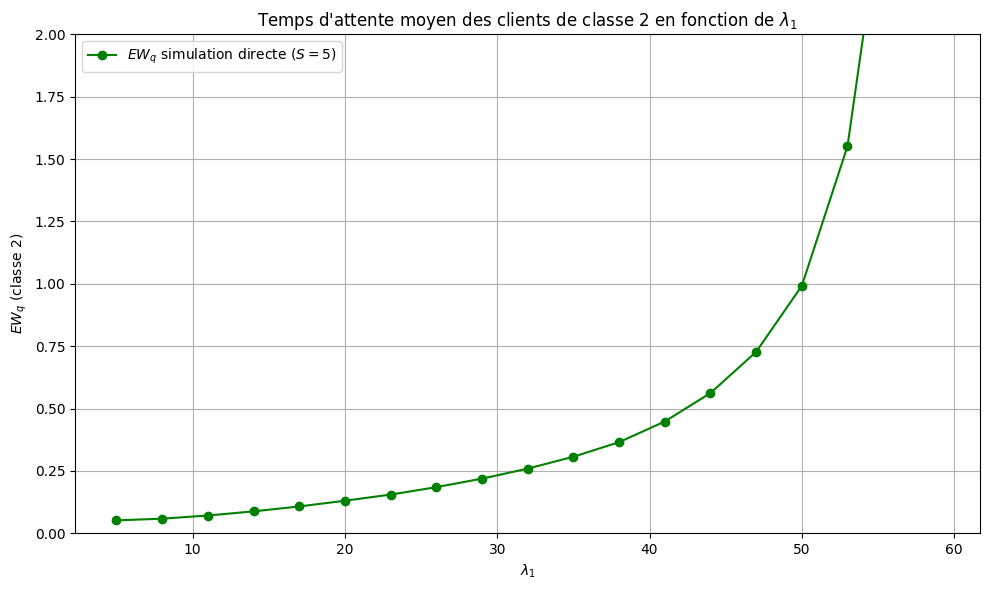

In [ ]:
#Parametres qui sont donnés dans m'article en 6.2
S = 5
mu1 = 4
mu2 = 20
lambda2 = 8
temps_simulation = 30000
lambda1_values = np.arange(5, 60, 3)

#Boucle sur les valeurs de \lambda_1 et ajoute le temps d'attente associé des type 2.
ewq_each_lambda1 = []
for lambda1 in lambda1_values:
    _, _, _, _, ewq = simulation(temps_simulation, S, mu1, mu2, lambda1, lambda2)
    ewq_each_lambda1.append(ewq)

#Plot le graph
plt.figure(figsize=(10, 6))
plt.plot(lambda1_values, ewq_each_lambda1, 'o-', color='red')
plt.xlabel(r"$\lambda_1$")
plt.ylabel(r"$EW_q$")
plt.title(r"Temps d'attente moyen des clients de classe 2 en fonction de $\lambda_1$ pour S=5")
plt.yticks(np.arange(0, 2.25, 0.25)) 
plt.ylim(0, 2)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

On observe que la courbe est très proche de celle de la Figure 2 de [1].

- Pour $\lambda_1 = 50$, on à bien $EW_q = 1$
- Pour $\lambda_1 = 30$, on à bien $EW_q \approx 0.25$
- Pour $\lambda_1 \geq 50$, on à bien $EW_q$ diverge $\implies$ saturation du systeme. 

Cela montre que ma simulation est cohérente avec la Figure 2 de [1].

